<a href="https://colab.research.google.com/github/ShubhamDeshmukh27/Email-Campaign-Prediction-/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement**

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. 



##**Objective**

The objective of this project is to provide marketers who are regularly authoring email marketing campaigns with a thorough understanding of what we’re doing, so they too can leverage the machine learning models to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

##**Importing**

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import folium
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches

##**Data Inspection**

In [4]:
#Reading csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Email Campaigned Project /data_email_campaign.csv')

In [5]:
#Number of rows and columns
df.shape

(68353, 12)

In [6]:
#Print top  rows 
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [7]:
#Description of dataset 
df.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00082172449600,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


In [8]:
#Type of features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


##**Data Description**

The data has the following features:
* Email_ID — This column contains the email ids of individuals.
* Email_type — Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or important email.
* Subject_Hotness_Score — It is the email effectiveness score.
* Email_Source — It represents the source of the email like sales or marketing or product type email.
* Email_Campaign_Type — Campaign type
* Total_Past_Communications — This column contains the previous mails from the same source.
* Customer_Location — Categorical data which explains the different demographics of the customers.
* Time_Email_sent_Category — It has 3 categories 1,2 and 3 which may give us
morning,evening and night time slots.
* Word_Count — It contains the no.of words contained in the mail.
* Total_Links — Total links from the mail.
* Total_Images — The banner images from the promotional email.
* Email_Status — It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

##**Basic Exploratary Data Analysis**

In [9]:
#Rename the columns
df = df.rename(columns={'Email_ID':'id','Email_Type':'email_type','Subject_Hotness_Score':'score','Email_Source_Type':'source_type','Customer_Location':'location','Email_Campaign_Type':'campaign_type','Total_Past_Communications':'past_communication','Time_Email_sent_Category':'category','Word_Count':'word_count','Total_Links':'total_links','Total_Images':'images','Email_Status':'status'})

In [10]:
#Data
df.head()

,id,email_type,score,source_type,location,campaign_type,past_communication,category,word_count,total_links,images,status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [11]:
#Check for any duplicates data
df.duplicated().sum()

0

##**Handelling Numerical Features**

In [12]:
#Extracting the numerical features
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['email_type', 'score', 'source_type', 'campaign_type',
       'past_communication', 'category', 'word_count', 'total_links', 'images',
       'status'],
      dtype='object')

###Univariate analysis

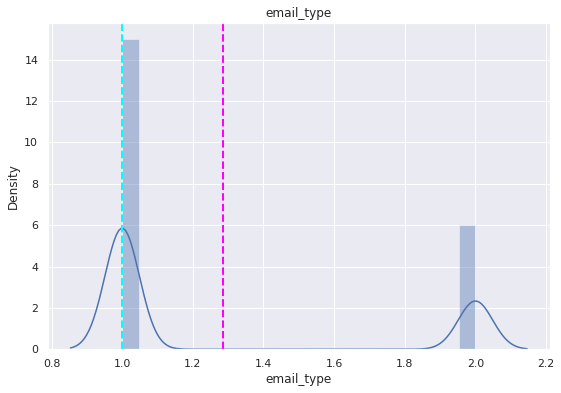

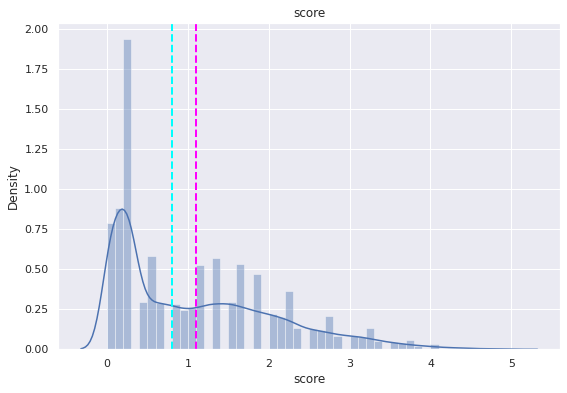

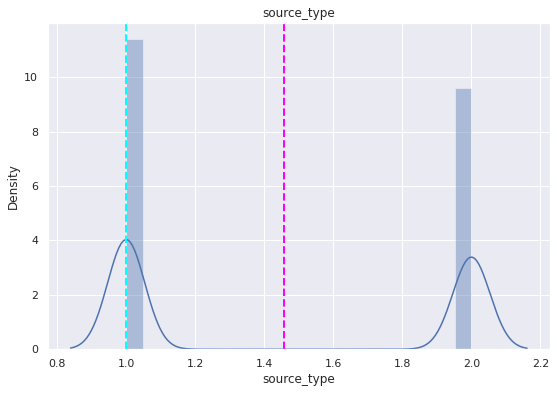

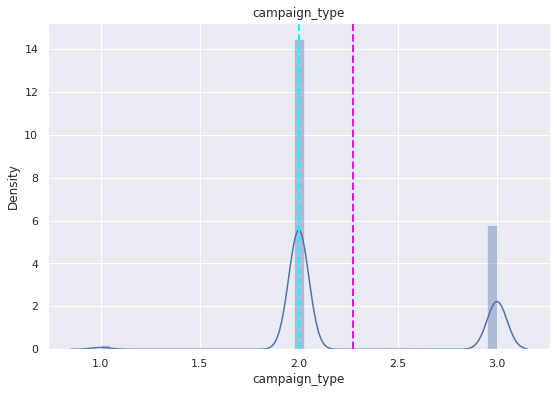

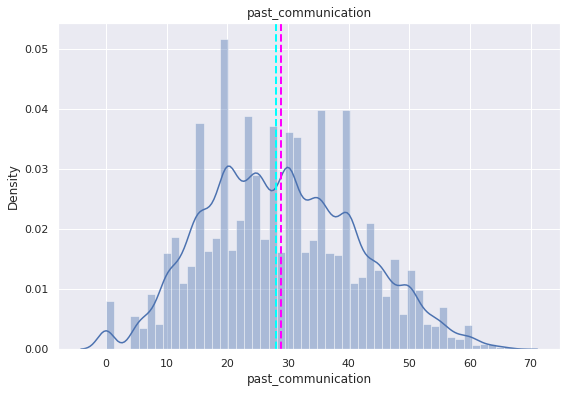

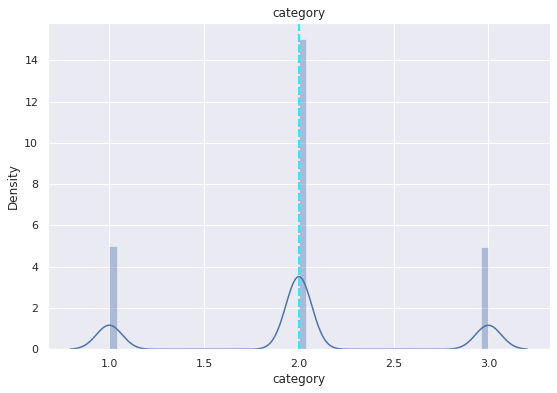

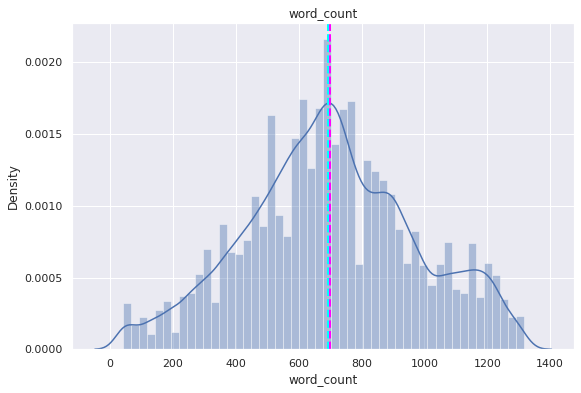

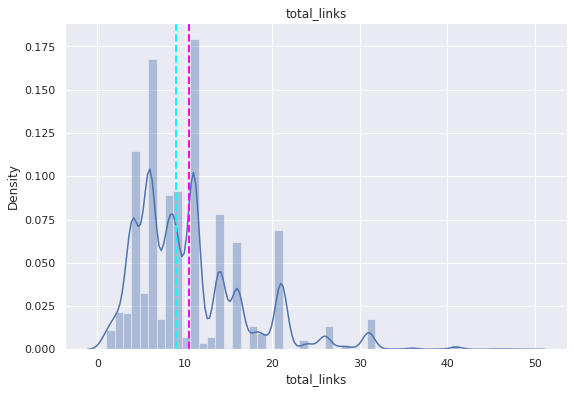

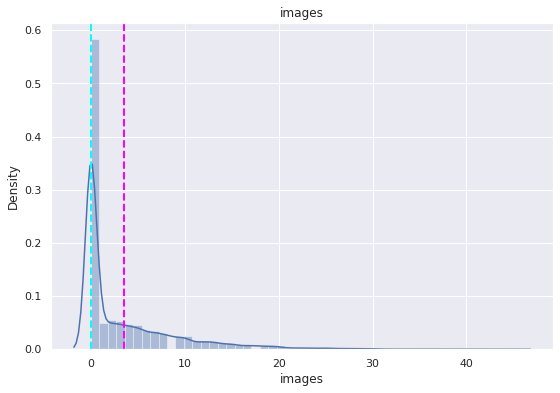

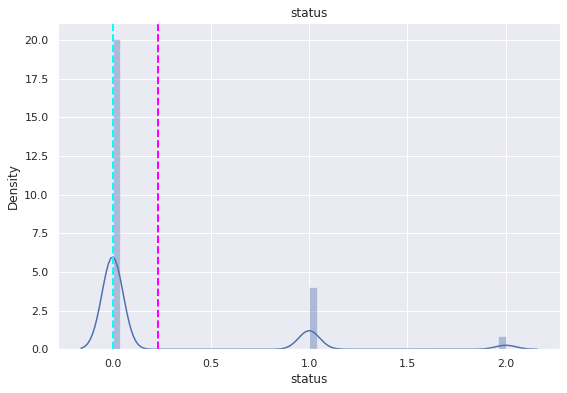

In [13]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

###The conclusion from above histograms


1.   The features for distribution is symmetric - 
         A)Word Count
         B)Past Communication


2.   The features for distribution is skewed -
         A)Images
         B)Total_links
         C)Score



###Bivariate Analysis

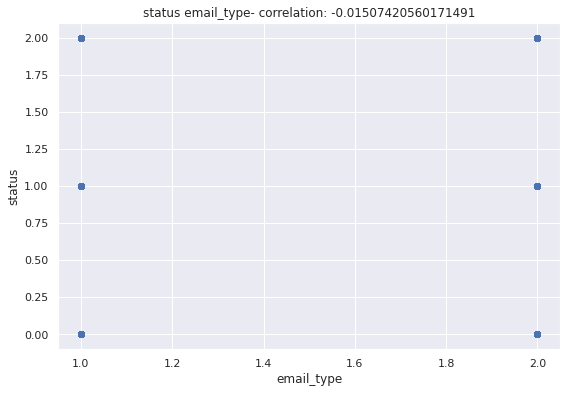

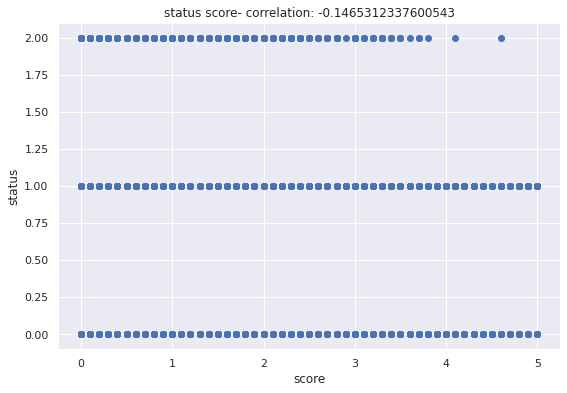

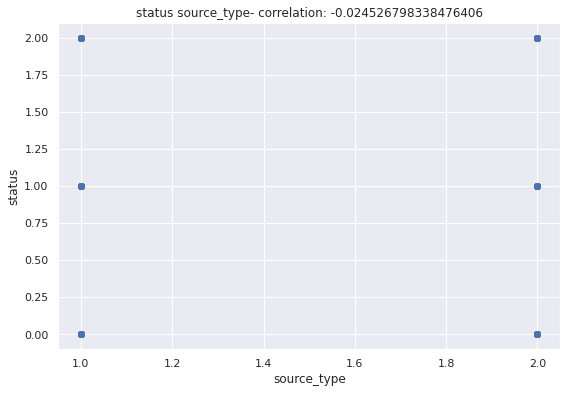

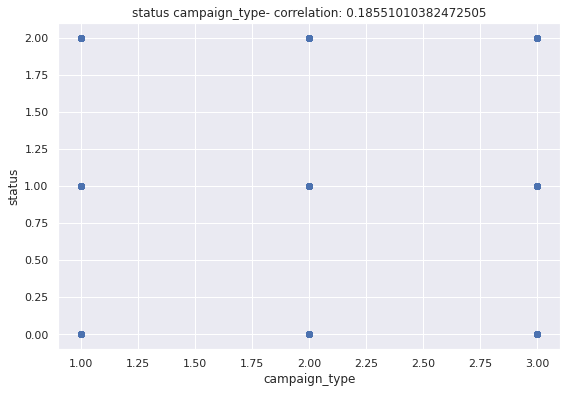

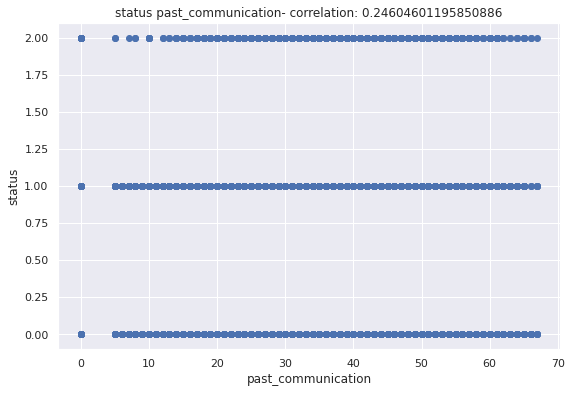

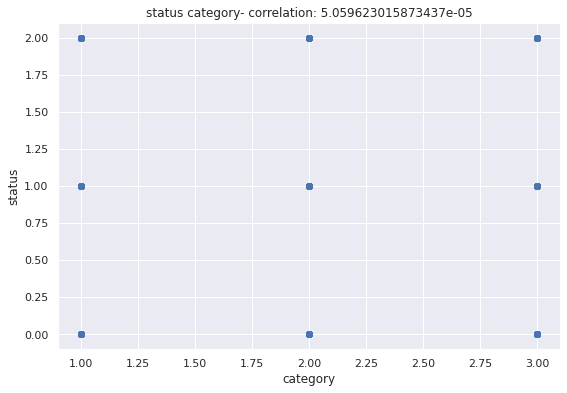

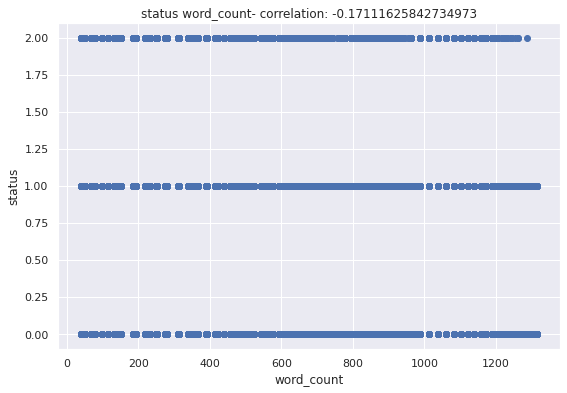

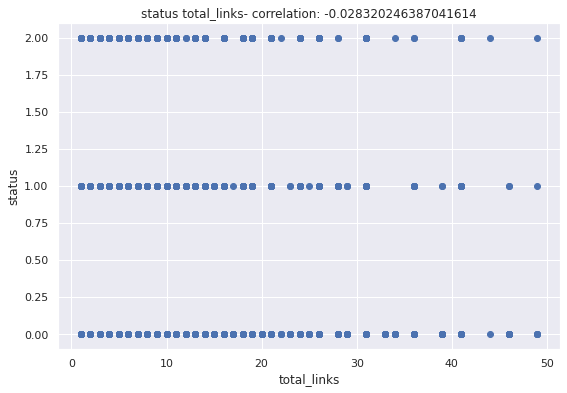

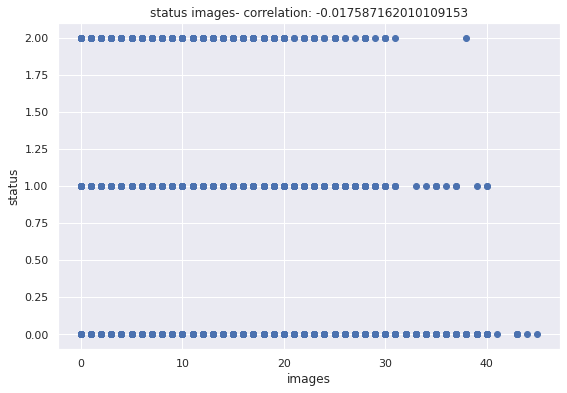

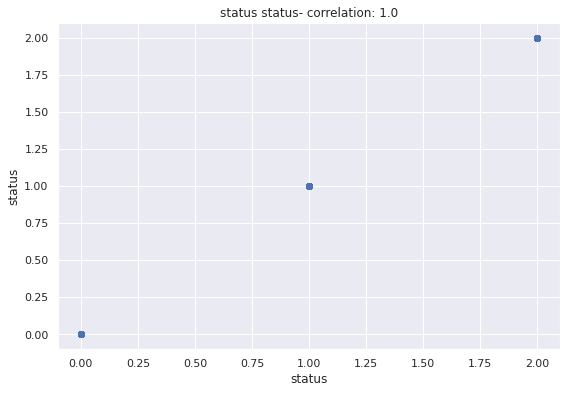

In [14]:
#plot a bar plot for each numerical feature count with scatter Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df[col]
  label=df['status']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('status')
  ax.set_title('status ' +col +'- correlation: '+ str(correlation))

####Conclusion from bivariate analysis
* 1)status feature is positively correlated with features past communication and category.
* 2)status feature is negatively correlated with features word count and score.

##**Handelling Categorical Features**

In [15]:
#Extracting the categorical features 
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['id', 'location'], dtype='object')

###Univariate Analysis 

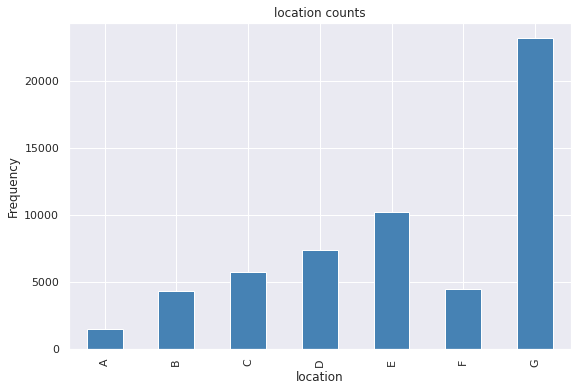

In [16]:
#plot a bar plot for each categorical feature count with Dist Plot
for col in categorical_features[1:]:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

###We can conclude from above histogram that location G is  highest in numbers.

###Bivariate Analysis

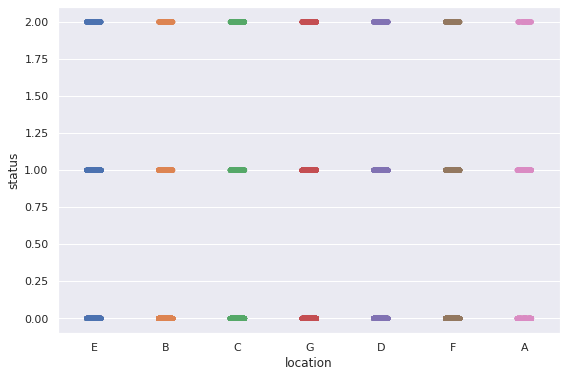

In [17]:
#plot a bar plot for each categorical feature count with Dist Plot
for col in categorical_features[1:]:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(x=df[col],y=df.status)

###Relationship between the dependent variable and independent variable

In [18]:
#creating list of features 
b = list(df.columns.tolist())

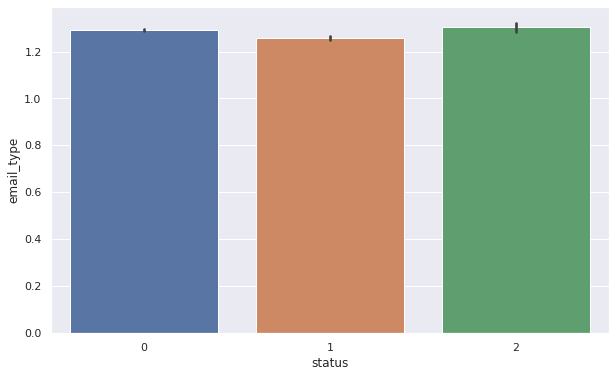

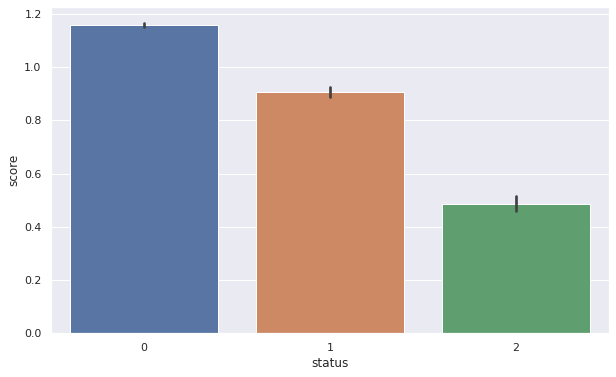

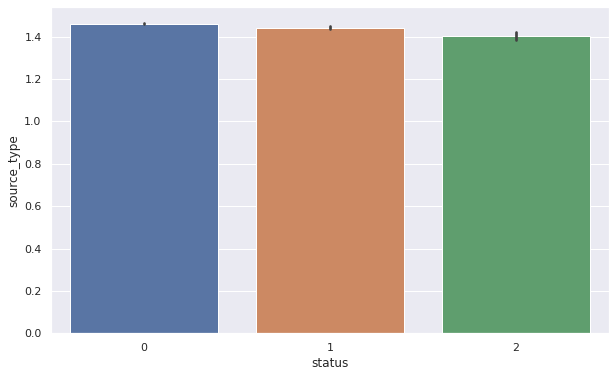

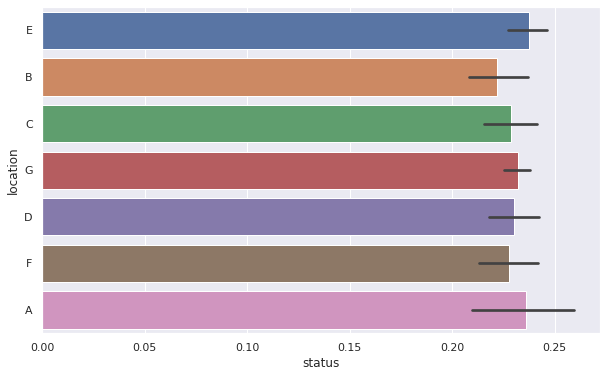

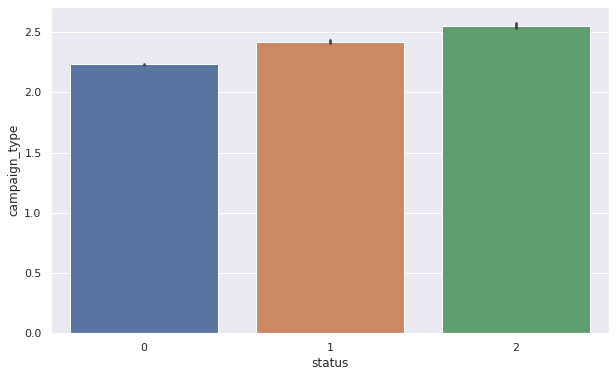

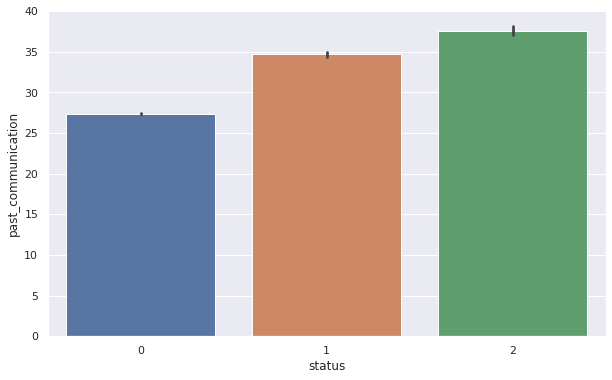

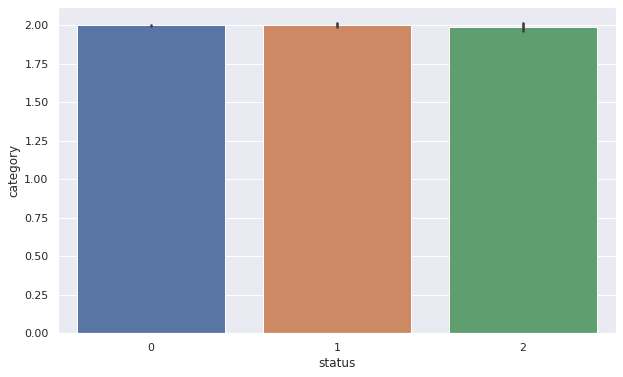

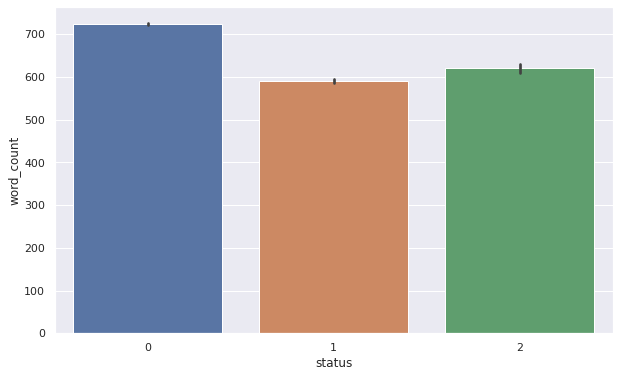

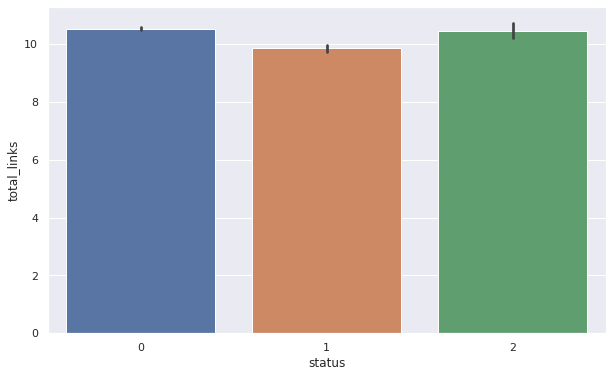

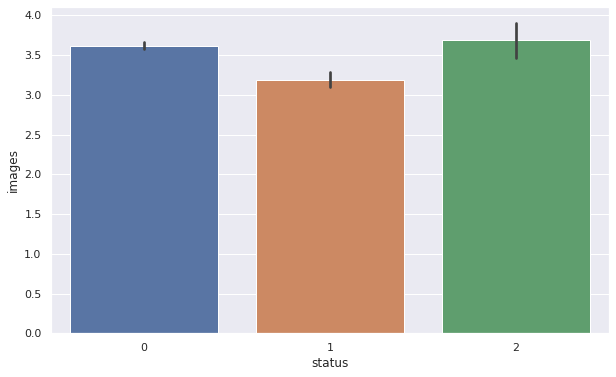

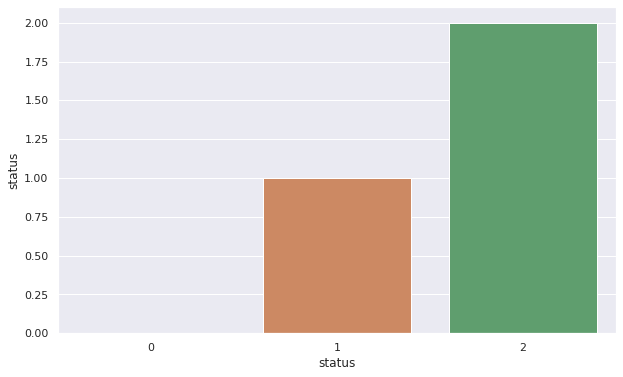

In [19]:
#Barplot of Status vs other features 
for col in b[1:]:
  plt.figure(figsize=(10, 6))
  sns.barplot(y=col, x='status', data=df)

####The barplot shows the relationship of dependent variable and independent variable.

In [20]:
#Deep dive data visulazation for some features.
c=list(df[['email_type','location','source_type','campaign_type','category']])

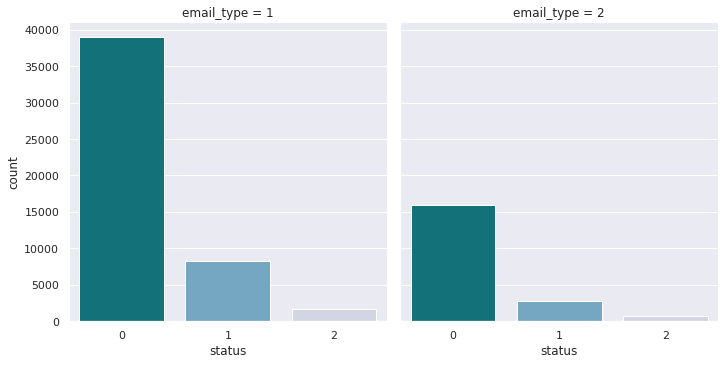

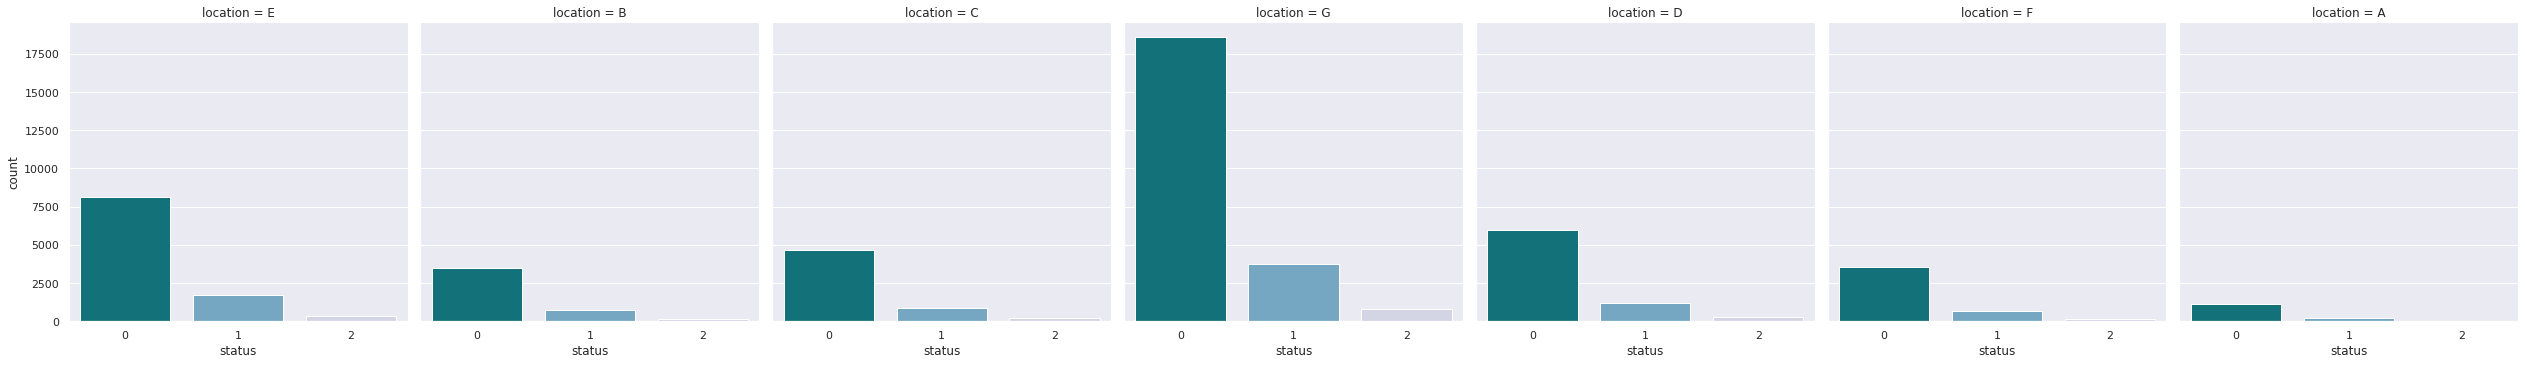

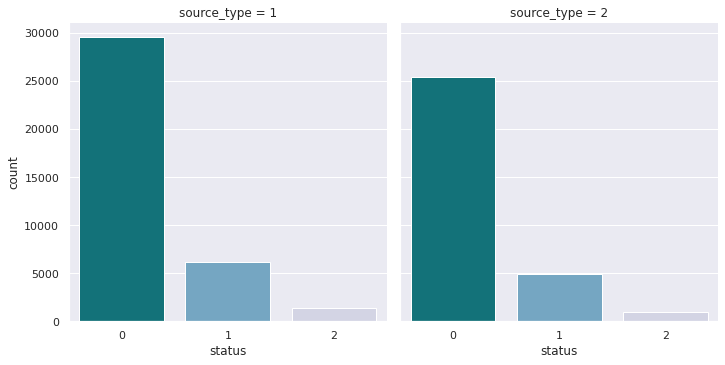

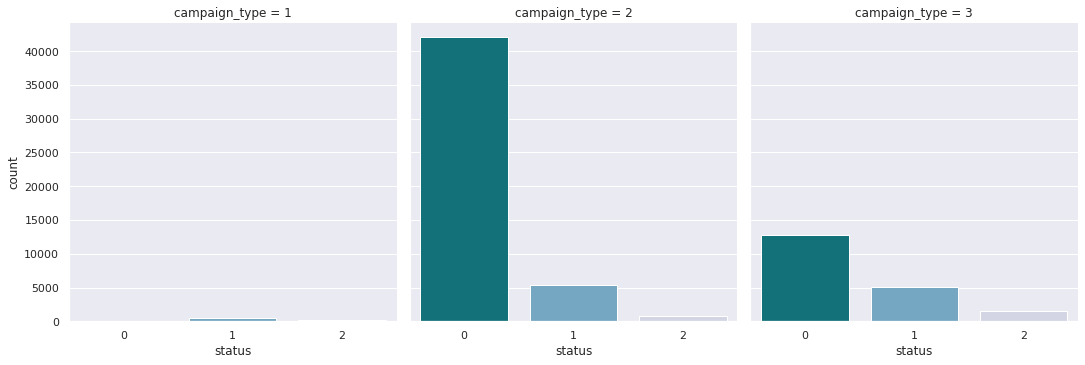

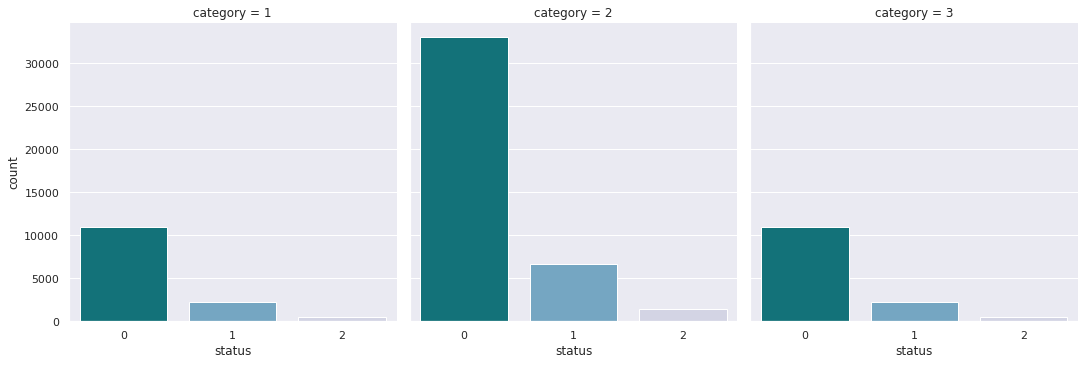

In [21]:
#Countplot 
for col in c[:]:
   sns.factorplot(x='status', col=col, kind='count', data=df,palette='PuBuGn_r');

####As we can in most of the barplots the status 0 is high in muber followed by status 1 and status 2.

###Dependent Variable visualization

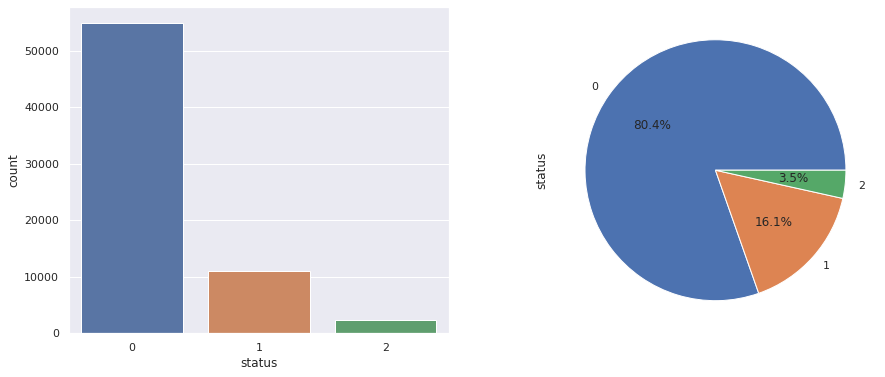

In [22]:
#plotting details of status features
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='status', data=df, ax=ax[0])
_ = df['status'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

####We have multiclass dependent variable and from pie chart we can see status has 80.4% data so we can conclude our data is imbalanced.

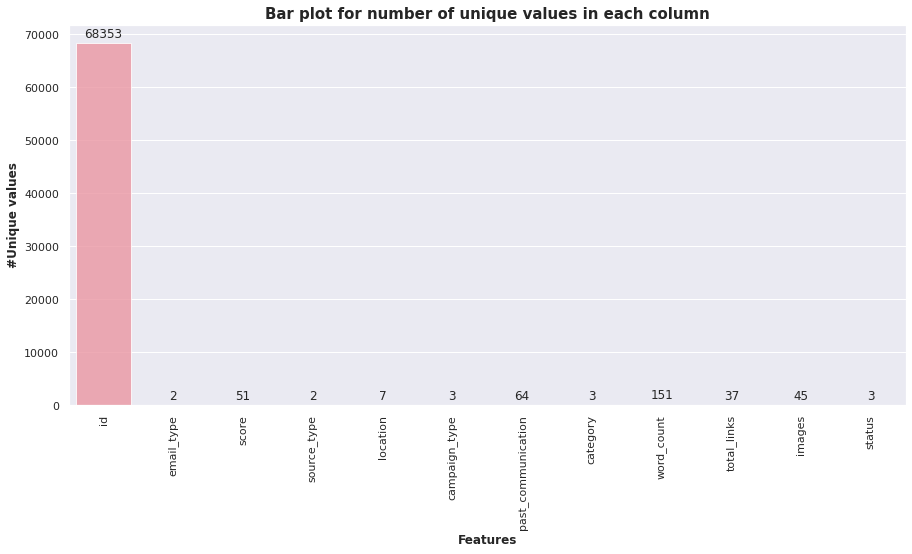

In [23]:
#Plotting unique values in each feature
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##**Handelling Missing Data** 

In [24]:
#missing values in our dataset
missing = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
missing.columns = ['No. of Missing Data', '% Missing Data']
missing

,No. of Missing Data,% Missing Data
id,0.0,0.000000
email_type,0.0,0.000000
score,0.0,0.000000
source_type,0.0,0.000000
location,11595.0,16.963411
campaign_type,0.0,0.000000
past_communication,6825.0,9.984931
category,0.0,0.000000
word_count,0.0,0.000000
total_links,2201.0,3.220049


####The feature location, total_links , images, past_communication features have missing values.

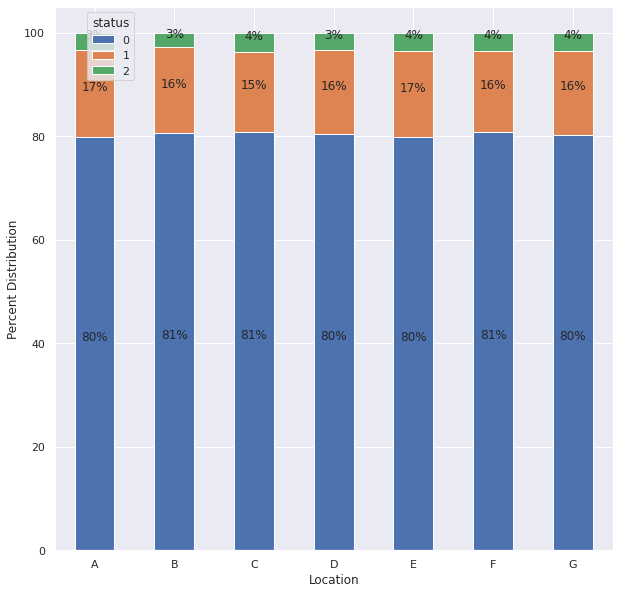

In [25]:
# crosstab
#pal = ["royalblue", "dodgerblue", "lightblue", "lightblue"]
ax= pd.crosstab(df['location'], df['status']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
#display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="status")
plt.xlabel('Location')
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

####As we can see irrespective of location the ratio of Status is same throughout .So we can drop the location column

####We saw in univariate analysis the past communuication feature is distrubuted symmetrical so we will substitute the null values with mean value. 

In [26]:
#replacing the missing values in past communication feature 
print('Number of missing values before imputing is = ',df['past_communication'].isnull().sum())
df['past_communication'].fillna(df['past_communication'].mean(),inplace=True)
print('Number of missing values after imputing is = ',df['past_communication'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


####We saw in univariate analysis the total images and links has right skewed distrubution so we will substitute the null values with mode value.

In [27]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',df['total_links'].isnull().sum())
df['total_links'].fillna(df['total_links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',df['total_links'].isnull().sum())
#Filling missing values of images column
print('Number of missing values before imputing is = ',df['images'].isnull().sum())
df['images'].fillna(df['images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',df['images'].isnull().sum())

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0
Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


##**Handelling Outliers**

In [31]:
#Extracting the discrete variables from feature
discrete = []
for var in numerical_features:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

email_type  values:  [1 2]
source_type  values:  [2 1]
campaign_type  values:  [2 3 1]
category  values:  [1 2 3]
status  values:  [0 1 2]
There are 5 discrete variables


In [32]:
#Extracting the continous variables from features
continuous = [var for var in numerical_features if var not in discrete and var not in ['Id']]

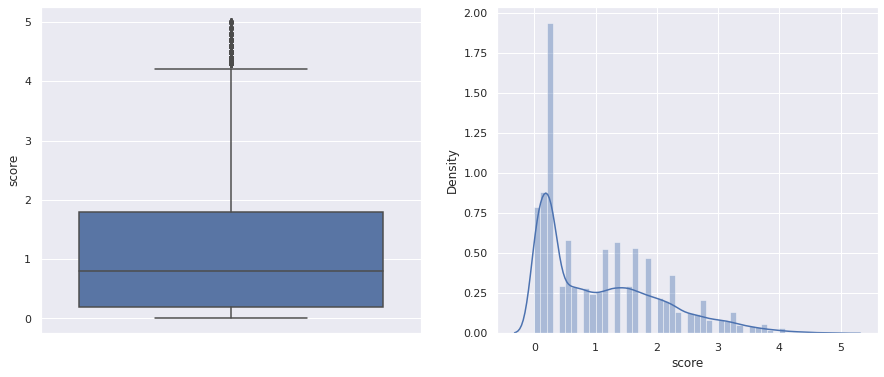

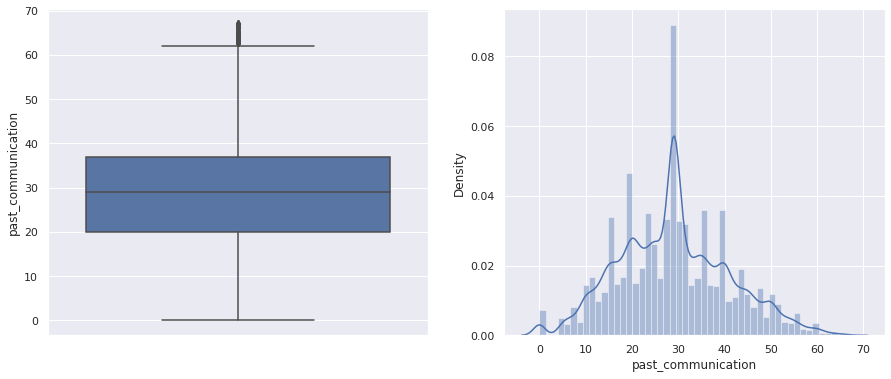

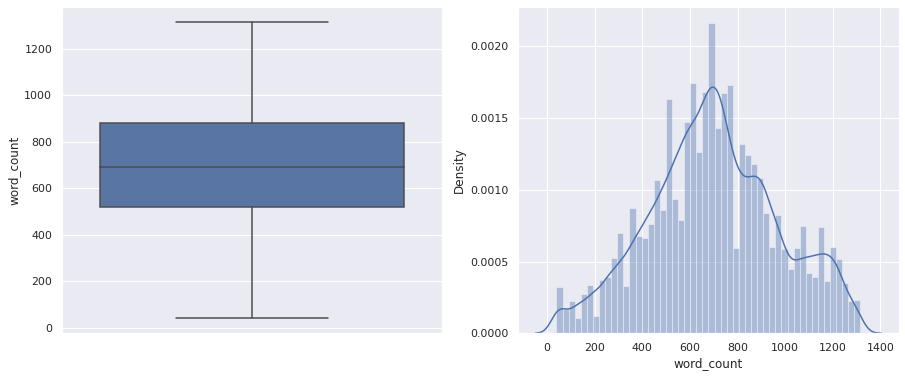

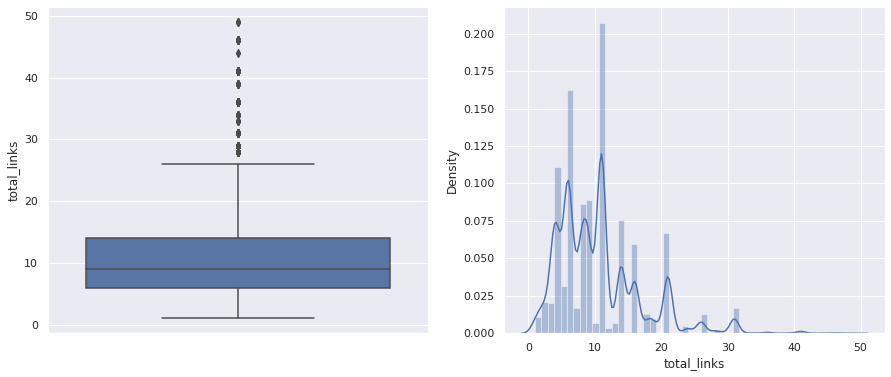

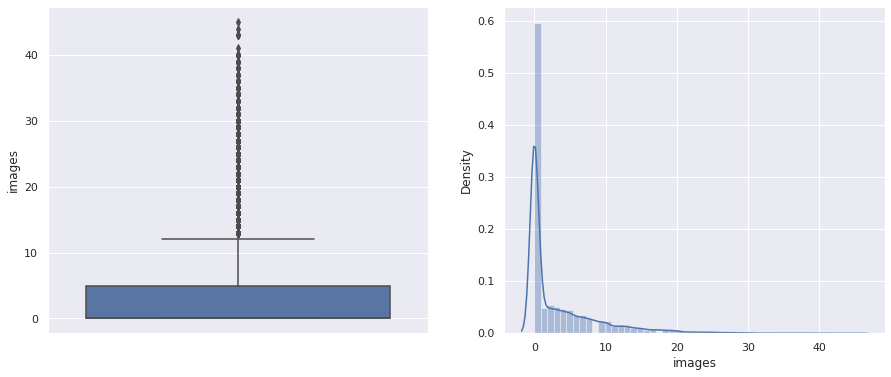

In [33]:
#plotting the outliers boxplot and spread of variance in features
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

###From above boxplot we can see features with null values are as follows :-
1.   Score
2.   Past communication
3.   total links 
4.   total images 



###Deep dive into these feature's outliers.

In [34]:
#Creating the temporary dataframe
temp_df = df[['status','score','images','total_links','past_communication']]

In [35]:
temp_df['status'] = temp_df.loc[temp_df.index, 'status'].copy()

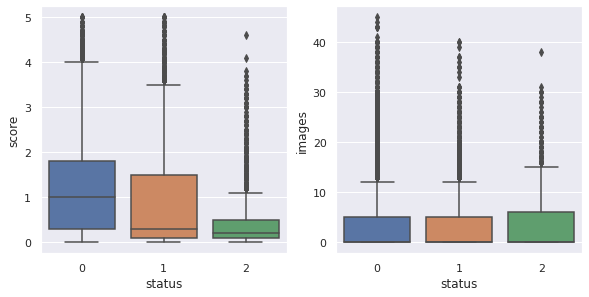

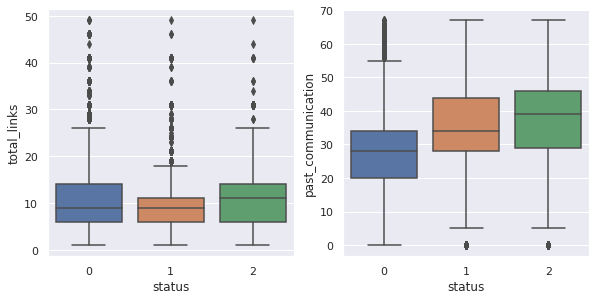

In [36]:
#plotiing outliers of features present w.r.t the status feature
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(temp_df.columns):
    if ix <= 3:
        if c != 'status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=temp_df, x='status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

####As we know our dataset imbalanced so removing outliers will affect on minority class so we will keep the outliers and we will use machine learning models which are robust to outliers.

##**Categorical encoding**

In [37]:
df.head()

,id,email_type,score,source_type,location,campaign_type,past_communication,category,word_count,total_links,images,status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [38]:
#creating dummies for categorical variables
cat_col=['email_type','source_type','source_type','location','campaign_type']
new_df=pd.get_dummies(df, columns=cat_col)
new_df.drop('email_type_2',axis=1,inplace=True) #Since they have binary category
new_df.drop('source_type_2',axis=1,inplace=True)

In [39]:
#print top 5 rows with dummies 
new_df.head()

,id,score,past_communication,category,word_count,total_links,images,status,email_type_1,source_type_1,source_type_1,location_A,location_B,location_C,location_D,location_E,location_F,location_G,campaign_type_1,campaign_type_2,campaign_type_3
0,EMA00081000034500,2.2,33.0,1,440,8.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,EMA00081000045360,2.1,15.0,2,504,5.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
2,EMA00081000066290,0.1,36.0,2,962,5.0,0.0,1,0,1,1,0,1,0,0,0,0,0,0,0,1
3,EMA00081000076560,3.0,25.0,2,610,16.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,EMA00081000109720,0.0,18.0,2,947,4.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [40]:
#Pushing Email_Status at last of the DataFrame
list_of_col=list(new_df.columns)
list_of_col.remove('status')
list_of_col.append('status')
list_of_col
new_df=new_df[list_of_col]
new_df.head(2)

,id,score,past_communication,category,word_count,total_links,images,email_type_1,source_type_1,source_type_1,source_type_1,source_type_1,location_A,location_B,location_C,location_D,location_E,location_F,location_G,campaign_type_1,campaign_type_2,campaign_type_3,status
0,EMA00081000034500,2.2,33.0,1,440,8.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,EMA00081000045360,2.1,15.0,2,504,5.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0


##**Data Transformation**

In [41]:
#Seprating the numerical columns
numerical_columns = new_df[['score','past_communication','word_count','images']]

In [42]:
#Applying standardization formula
for column in numerical_columns:
  new_df[column] = ((new_df[column] - new_df[column].mean()) / (new_df[column].std()))

In [43]:
#Print last 5 rows 
new_df.tail()

,id,score,past_communication,category,word_count,total_links,images,email_type_1,source_type_1,source_type_1,source_type_1,source_type_1,location_A,location_B,location_C,location_D,location_E,location_F,location_G,campaign_type_1,campaign_type_2,campaign_type_3,status
68348,EMA00089995974500,-0.697169,-0.582912,3,0.136421,16.0,1.716693,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0
68349,EMA00089998225300,0.205016,0.930435,2,-0.172721,31.0,2.256735,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0
68350,EMA00089998436500,1.107201,0.341911,2,-0.772605,9.0,-0.623490,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
68351,EMA00089999168800,-0.697169,1.771183,1,0.121700,14.0,0.096566,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0
68352,EMA00089999316900,0.405501,-0.751061,2,1.244181,6.0,-0.623490,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0


###**Correlation**

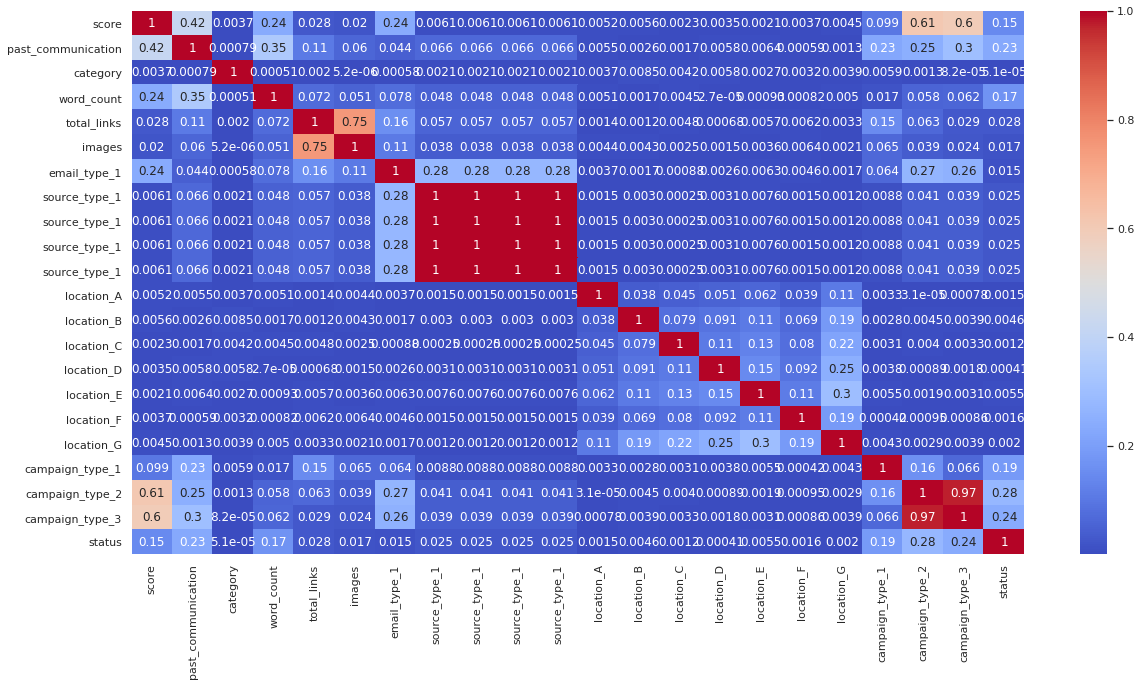

In [44]:
## Correlation
plt.figure(figsize=(20,10))
correlation=new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

###From above correlation plot we can conclude that :-
* 1)Images and total links have high correlation
* 2)Campaign type and score has high correlation
* 3)Past communication and score has high correlation

In [45]:
# Dealing with Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [46]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['id','location','email_type','source_type','campaign_type','category','total_links','images','status','source_type_1']]])

,variables,VIF
0,score,2.411241
1,past_communication,1.939716
2,word_count,1.526551
3,email_type_1,1.121603
4,location_A,1.101572
5,location_B,1.287216
6,location_C,1.370743
7,location_D,1.461264
8,location_E,1.599116
9,location_F,1.292755


#### Here We can see the vif < 5 so we are abled to remove multicollinearity. 

##**Features selection**

Tree-based: SelectFromModel

SelectFromModel is an Embedded method. Embedded methods use algorithms that have built-in feature selection methods.

Here,

We have used RandomForest() to select features based on feature importance. We calculate feature importance using node impurities in each decision tree.

In Random forest, the final feature importance is the average of all decision tree feature importance.

In [47]:
# Data for all the independent variables
X = new_df.drop(labels=['status','id'],axis=1)

# Data for the dependent variable
y = new_df['status']

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=40), max_features=18,threshold=0.04)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

6 selected features


In [49]:
#Important features list
embeded_rf_feature

['score',
 'past_communication',
 'category',
 'word_count',
 'total_links',
 'images']

In [50]:
#Creating the final datadrame for modelling
final_df=new_df[['score','past_communication','category','word_count','total_links','images','status']]

In [51]:
#FPrint top 5 rows 
final_df.head()

,score,past_communication,category,word_count,total_links,images,status
0,1.107201,0.341911,1,-0.956618,8.0,-0.62349,0
1,1.006958,-1.171435,2,-0.721081,5.0,-0.62349,0
2,-0.997898,0.594136,2,0.964481,5.0,-0.62349,1
3,1.909143,-0.330687,2,-0.330973,16.0,-0.62349,0
4,-1.098141,-0.919211,2,0.909277,4.0,-0.62349,0


##**Handelling the imbalanced data**

Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

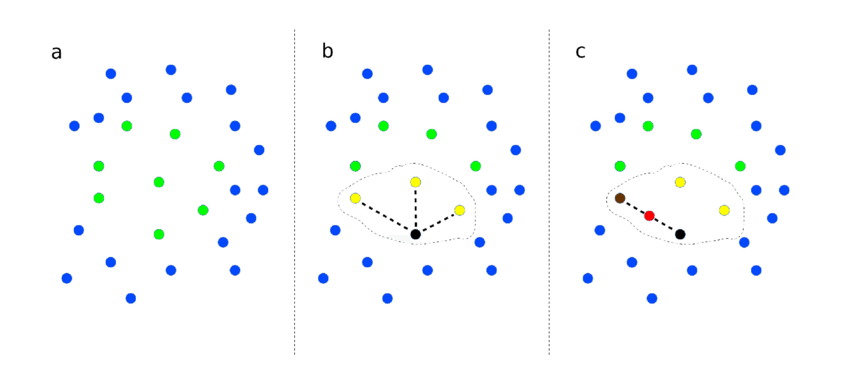

In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(final_df.iloc[:,1:-1], final_df['status'])

print('Original dataset shape', len(final_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 68353
Resampled dataset shape 164823


Text(0.5, 1.0, 'Before SMOTE')

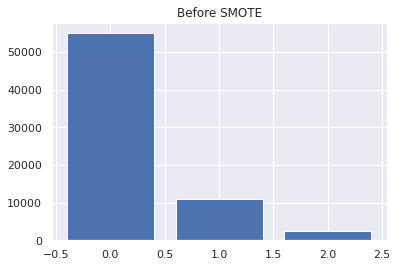

In [53]:
plt.bar(Counter(final_df['status']).keys(), Counter(final_df['status']).values())
plt.title("Before SMOTE")

Text(0.5, 1.0, 'After SMOTE')

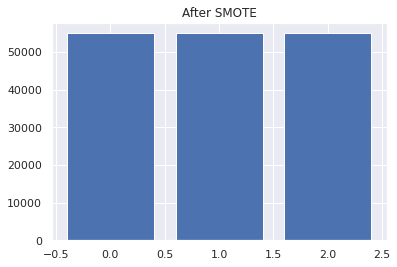

In [54]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

In [55]:
#Unique elemnets of status features 
unique_elements, counts_elements = np.unique(y_smote, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[    0     1     2]
 [54941 54941 54941]]


###**Splitting datsaset into Train -Test for modelling**

In [56]:
from sklearn.model_selection import train_test_split
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify= y_smote)

####Here we splitted our data into train-test in 80:20 ratio respectively.

##**Modelling**

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Function to get score of model in dataframe
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        train_class_preds = model.predict(X_train)
        test_class_preds = model.predict(X_test)

        # Get the probabilities on train and test
        train_preds = model.predict_proba(X_train)
        test_preds = model.predict_proba(X_test)

        # Calculating accuracy on train and test
        train_accuracy = accuracy_score(y_train,train_class_preds)
        test_accuracy = accuracy_score(y_test,test_class_preds)

        # Get the confusion matrices for train and test
        train_cm = confusion_matrix(y_train,train_class_preds)
        test_cm = confusion_matrix(y_test,test_class_preds )


        # Get the Recall for train and test
        train_recall = recall_score(y_train, train_class_preds, average='weighted')
        test_recall = recall_score(y_test, test_class_preds, average='weighted')

        # Get the precision for train and test
        train_precision = precision_score(y_train, train_class_preds, average='weighted')
        test_precision = precision_score(y_test, test_class_preds, average='weighted')

        # Get the f1 Score for train and test
        train_f1score = f1_score(y_train, train_class_preds, average='weighted')
        test_f1score = f1_score(y_test, test_class_preds, average='weighted')

        # Get the roc_auc score for train and test dataset
        train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
        test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')
              
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Recall_Train"]=round(train_recall,2)
        df.loc[i,"Recall_Test"]=round(test_recall,2)
        df.loc[i,"Precision_Train"]=round(train_precision,2)
        df.loc[i,"Precision_Test"]=round(test_precision,2)
        df.loc[i,"Train_F1score"]=round(train_f1score,2)
        df.loc[i,"Test_F1score"]=round(test_f1score,2)
        df.loc[i,"Train_AUC"]=round(train_auc,2)
        df.loc[i,"Test_Auc"]=round(test_auc,2)
        df.loc[i,"Train_accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_accuracy"]=round(test_accuracy,2)
        
        i+=1
    
    return df

In [60]:
#Function to get the AUC-ROC Curve
def model_roc_auc(model_name):
    train_preds = model_name.predict_proba(X_train)
    test_preds = model_name.predict_proba(X_test)

    # Get the roc_auc score for train and test dataset
    train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
    test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

    fpr = {}
    tpr = {}
    thresh ={}
    n_class=3
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend()

###**Decision Tree Classifier**

In [61]:
# Fit the decision tree model
dt_classifier_smote = DecisionTreeClassifier()
dt_classifier_smote.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
#Score of the model
models = [dt_classifier_smote]
report1=score_model(X_train,y_train,X_test,y_test)
report1.rename(columns={'DecisionTreeClassifier': 'Decision_Tree_classifier'},inplace=True)
report1

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,DecisionTreeClassifier,0.99,0.76,0.99,0.75,0.99,0.76,1.0,0.82,0.99,0.76


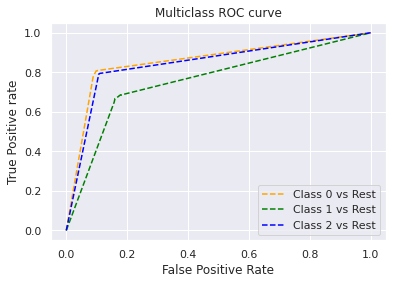

In [63]:
#TPR VS FPR
model_roc_auc(dt_classifier_smote)

###**XGBoost model**

In [64]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=25,min_samples_leaf=20,min_samples_split=30)

In [65]:
# Fit the model
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, min_samples_leaf=20, min_samples_split=30,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [66]:
#Get the score of model
models = [xgb_model]
report2=score_model(X_train,y_train,X_test,y_test)
report2

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,XGBClassifier,0.98,0.84,0.98,0.84,0.98,0.84,1.0,0.95,0.98,0.84


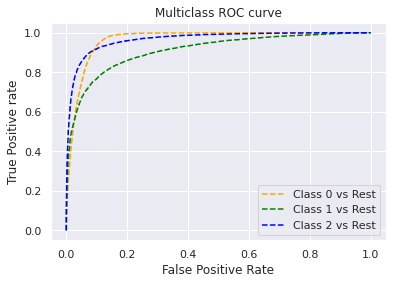

In [67]:
#TPR VS FPR
model_roc_auc(xgb_model)

###**KNN Classifier**

In [68]:
classifier_knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)

# Fit the model on the train set
classifier_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [69]:
#Get the score of the model
models = [classifier_knn]
report3=score_model(X_train,y_train,X_test,y_test)
report3

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,KNeighborsClassifier,0.85,0.75,0.85,0.75,0.85,0.75,0.97,0.89,0.85,0.75


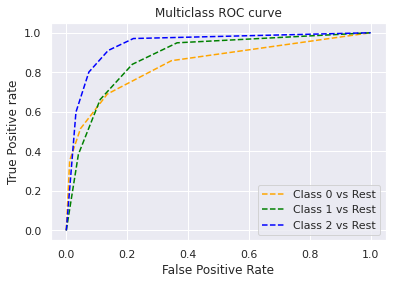

In [70]:
#TPR Vs FPR
model_roc_auc(classifier_knn)

###**RandomsearchCV knn model**

In [71]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,5)}

In [72]:
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': array([1, 2, 3, 4])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [73]:
#To get the score of model
models = [knn_cv]
report4=score_model(X_train,y_train,X_test,y_test)
report4

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,RandomizedSearchCV,0.98,0.78,0.98,0.78,0.98,0.78,0.99,0.84,0.98,0.78


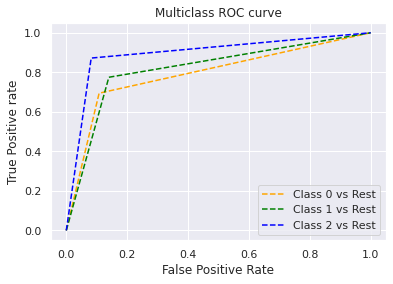

In [74]:
#TPR VS FPR 
model_roc_auc(knn_cv)

###**RandomForest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
#Get the score of model
models = [classifier_rf]
report5=score_model(X_train,y_train,X_test,y_test)
report5

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,RandomForestClassifier,0.98,0.81,0.98,0.81,0.98,0.81,1.0,0.92,0.98,0.81


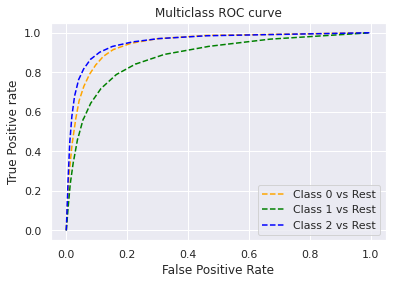

In [78]:
#TPR vs FPR
model_roc_auc(classifier_rf)

##**Evaluation Of all models**

In [79]:
#Concating all scores and crating one new dataframe
Comparing_all_models = pd.concat([report1,report2,report3,report4,report5],ignore_index=True)
Comparing_all_models['Model_Name'] = Comparing_all_models['Model_Name'].replace(['RandomizedSearchCV'],'KNNRandomizedSearchCV')

In [80]:
Comparing_all_models

,Model_Name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Train_F1score,Test_F1score,Train_AUC,Test_Auc,Train_accuracy,Test_accuracy
0,DecisionTreeClassifier,0.99,0.76,0.99,0.75,0.99,0.76,1.00,0.82,0.99,0.76
1,XGBClassifier,0.98,0.84,0.98,0.84,0.98,0.84,1.00,0.95,0.98,0.84
2,KNeighborsClassifier,0.85,0.75,0.85,0.75,0.85,0.75,0.97,0.89,0.85,0.75
3,KNNRandomizedSearchCV,0.98,0.78,0.98,0.78,0.98,0.78,0.99,0.84,0.98,0.78
4,RandomForestClassifier,0.98,0.81,0.98,0.81,0.98,0.81,1.00,0.92,0.98,0.81


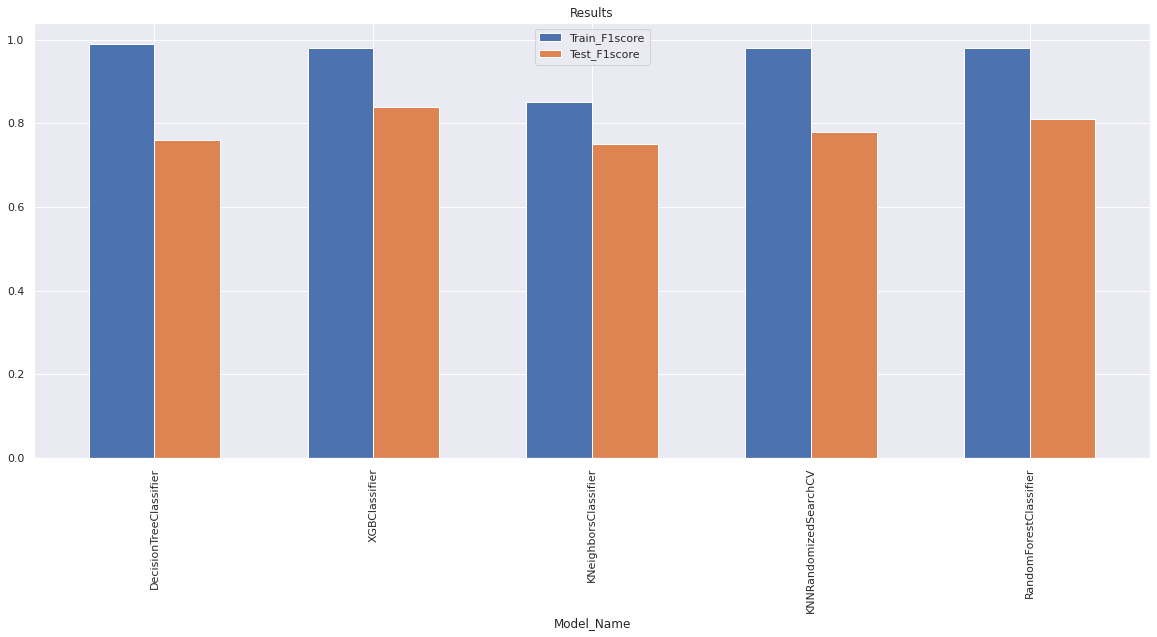

In [81]:
Comparing_all_models.plot.bar(x="Model_Name", y=['Train_F1score','Test_F1score'], title = 'Results' , width = .6, figsize= (20,8))

####From the above plots we can observe that XG-Boost performed well as compared to all the other models both for train as well as test.

##**SHAP**

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see papers for details and citations).

In [82]:
!pip install shap

     |████████████████████████████████| 356 kB 37.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491642 sha256=3e47c27715ae0df4f0fd8444ead93c5e2b7eea31689e5f7ed4a84495ae0440e1
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [83]:
import shap
shap.initjs()

In Our case 
* Feature 0 - Score
* Feature 1-  Past communication
* Feature 2-  Category
* Feature 3-  Word Count
* Feature 4-  images


In [86]:
explainer_train = shap.TreeExplainer(dt_classifier_smote)
shap_values_train = explainer_train.shap_values(X_train)

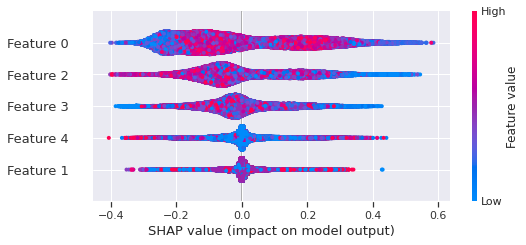

In [87]:
shap.summary_plot(shap_values_train[1],X_train,plot_type='dot')

Above plot shows global summary of the distribution of SHAP values over all features. For each feature (horizontal rows), you can see the distribution of feature importances. From the diagram we can see that score and category have large effects on the prediction over the entire dataset (high SHAP value shown on bottom axis). High category values affect the prediction negatively (red values on the left hand side), while score category values affect the prediction positively (red values on the right hand side), similarly in the opposite direction for both variables.

In [88]:
explainer_test = shap.TreeExplainer(dt_classifier_smote)
shap_values_test = explainer_test.shap_values(X_test)

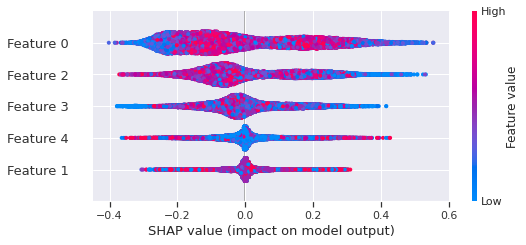

In [89]:
shap.summary_plot(shap_values_test[1],X_test,plot_type='dot')

Here we have similiar kind of result as above plot.

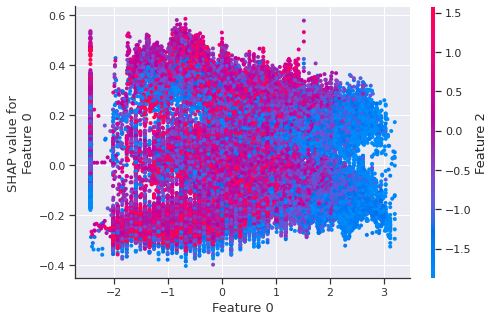

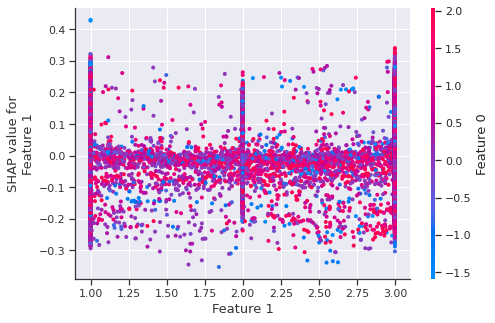

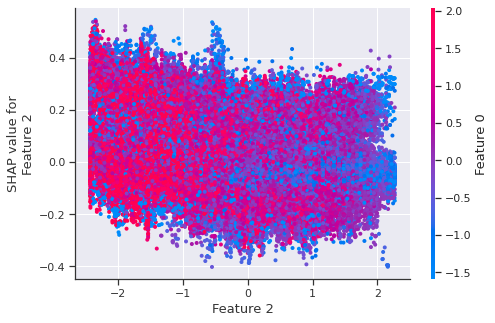

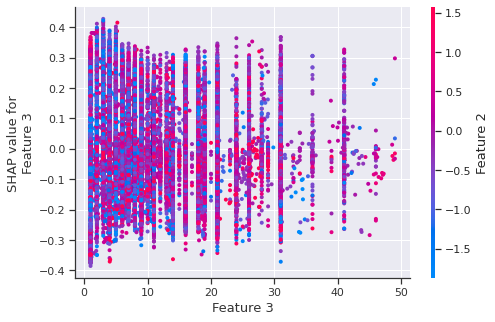

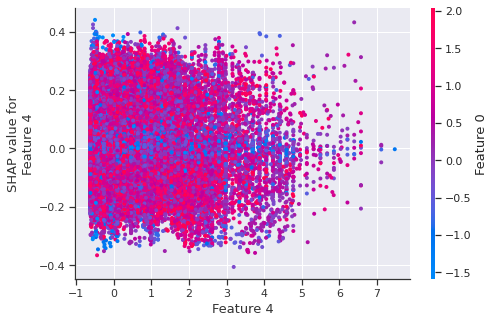

In [90]:
top_vars = ['Feature 0','Feature 1','Feature 2','Feature 3','Feature 4']
for elem in top_vars:
   shap.dependence_plot(elem, shap_values_train[1], X_train)

###Interpretation from interpretation plot
* 1)The 1 st graph - (Score vs Category)
The high score and low value of category decreases the probabilty of target class.
* 2)The 2 nd graph - (Score vs Past communication)
The low score and high past communication decreased the probabilty of target class.
* 3)The 4 th graph - (Category vs Word count)
The low word count and high category value increased the probabilty of target class
* 4)The 5 th graph - (Total links vs score)
Low value of links and high score increased the probabilty of target class.  

##**Conclusion**

* In EDA, we observed that the category 2 , email-type 1 & campaign type-2 was high in number.Univariate analysis and bivariate analysis gave us features information distrubution.

* It was observed that both Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was same irrespective of the demographic or the time frame the emails were sent on.

* We have imbalanced data the status with value 0 comparises 80% of data.So to deal with it we used SMOTE method.

* Based on the metrics, XG Boost Classifier worked the best giving a train score of 98% and test score of 84%  for F1 score.

* From SHAP we observed that the score and Category are important features.